<a href="https://colab.research.google.com/github/Ashishkumarpanda/Train-Plot-CNN-layer/blob/main/Hidddenlayercheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras-tuner

In [2]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D
from keras.optimizers import Adam
from keras.activations import relu,softmax
from kerastuner import RandomSearch
from keras.utils.vis_utils import plot_model

In [3]:
data=keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


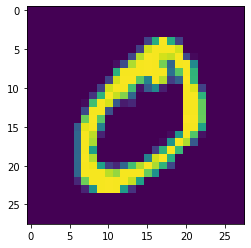

In [5]:
plt.imshow(x_train[1])

In [6]:
x_train=x_train/255.0
x_test=x_test/255.0


In [7]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [8]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [9]:
search=RandomSearch(build_model,'val_accuracy',max_trials=5,directory='output',project_name='mnist')

In [10]:
search.search(x_train,y_train,epochs=3,validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 8s 5ms/step - loss: 2.3249 - accuracy: 0.1108 - val_loss: 2.3034 - val_accuracy: 0.1050
Epoch 2/3
1688/1688 [==============================] - 7s 4ms/step - loss: 2.3025 - accuracy: 0.1099 - val_loss: 2.3041 - val_accuracy: 0.1050
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 2.3024 - accuracy: 0.1110 - val_loss: 2.3024 - val_accuracy: 0.1050


Epoch 1/3
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1031 - accuracy: 0.9667 - val_loss: 0.0531 - val_accuracy: 0.9848
Epoch 2/3
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0378 - accuracy: 0.9888 - val_loss: 0.0433 - val_accuracy: 0.9867
Epoch 3/3
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0432 - val_accuracy: 0.9905


Epoch 1/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1270 - accuracy: 0.9618 - val_loss: 0.0544 - val_accuracy: 0.9845
Epoch 2/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.0496 - val_accuracy: 0.9865
Epoch 3/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0466 - val_accuracy: 0.9873


Epoch 1/3
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1028 - accuracy: 0.9684 - val_loss: 0.0471 - val_accuracy: 0.9860
Epoch 2/3
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0567 - val_accuracy: 0.9837
Epoch 3/3
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.0420 - val_accuracy: 0.9898


Epoch 1/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1817 - accuracy: 0.9474 - val_loss: 0.0890 - val_accuracy: 0.9742
Epoch 2/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0944 - accuracy: 0.9731 - val_loss: 0.0859 - val_accuracy: 0.9788
Epoch 3/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0796 - accuracy: 0.9776 - val_loss: 0.1250 - val_accuracy: 0.9745


INFO:tensorflow:Oracle triggered exit


In [11]:
model=search.get_best_models(num_models=1)[0]

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 48)        153648    
_________________________________________________________________
flatten (Flatten)            (None, 23232)             0         
_________________________________________________________________
dense (Dense)                (None, 80)                1858640   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
Total params: 2,014,378
Trainable params: 2,014,378
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=10,validation_split=0.1,initial_epoch=3)

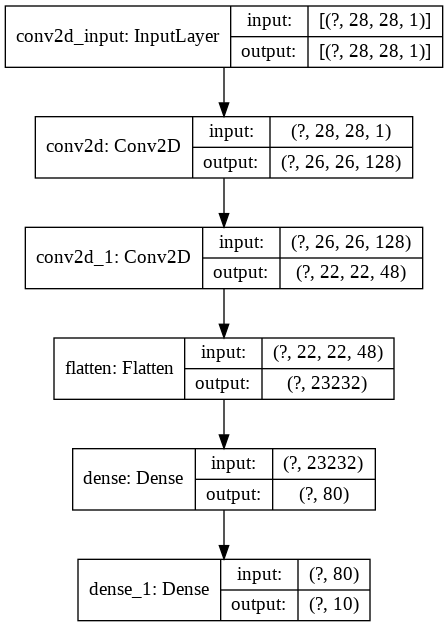

In [15]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)